         Date  AveragePrice  Total Volume  Total Bags  Small Bags  Large Bags  \
0  2015-12-27          1.33      64236.62     8696.87     8603.62       93.25   
1  2015-12-20          1.35      54876.98     9505.56     9408.07       97.49   
2  2015-12-13          0.93     118220.22     8145.35     8042.21      103.14   
3  2015-12-06          1.08      78992.15     5811.16     5677.40      133.76   
4  2015-11-29          1.28      51039.60     6183.95     5986.26      197.69   

   XLarge Bags          type  year  region  
0          0.0  conventional  2015  Albany  
1          0.0  conventional  2015  Albany  
2          0.0  conventional  2015  Albany  
3          0.0  conventional  2015  Albany  
4          0.0  conventional  2015  Albany  
       AveragePrice  Total Volume    Total Bags    Small Bags    Large Bags  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.396392e+05  1.821947e+05  5.433809e+04   
std   

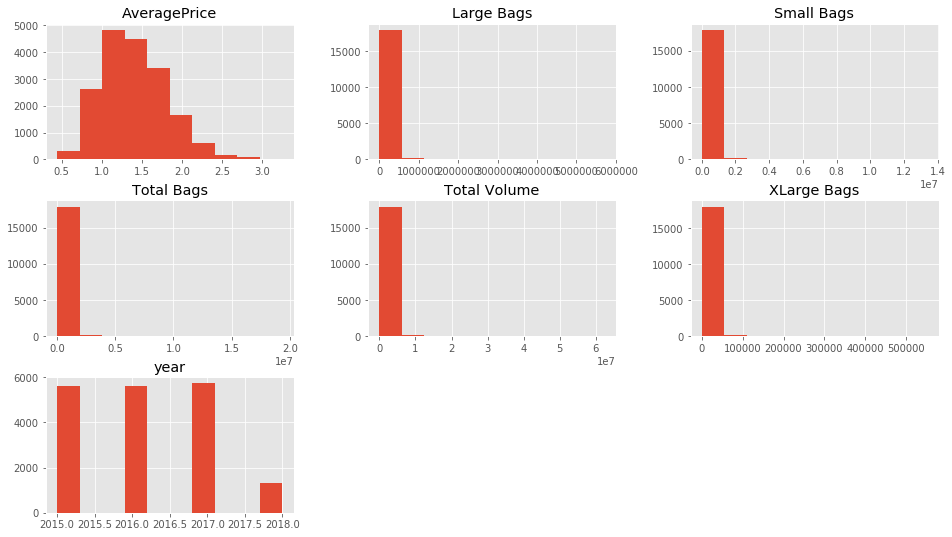

(18249, 4)


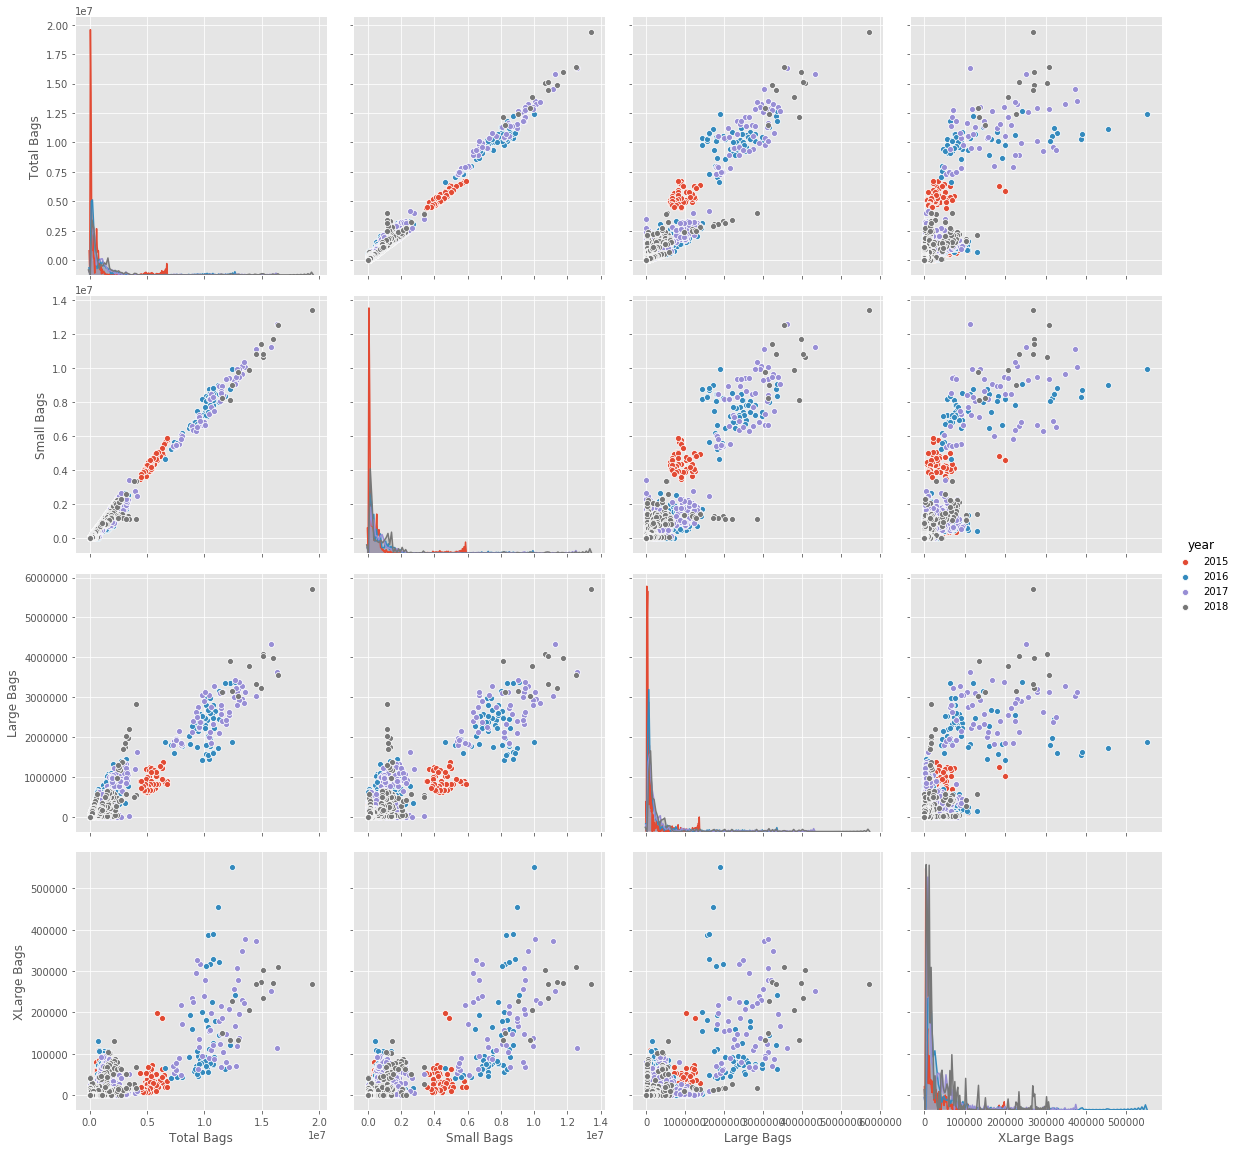

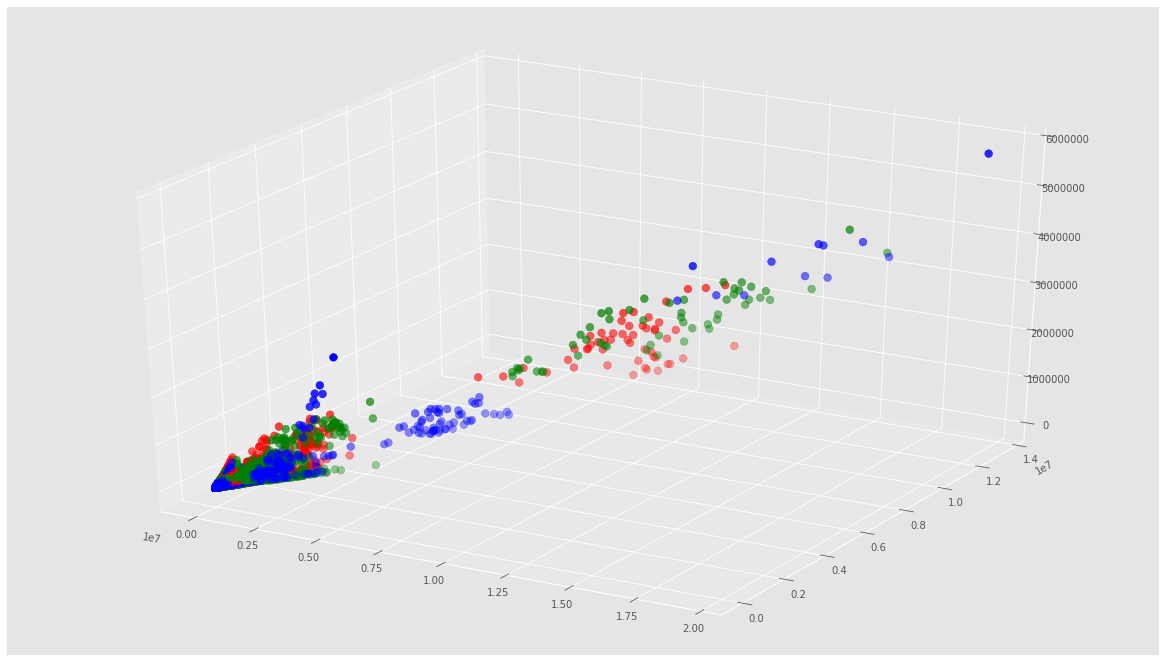

In [72]:
# Importando librerias que permitiran ejecutar el algoritmo y graficar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Carga de datos
data = pd.read_csv("avocado.csv")

# Eliminando variabes que no sirven 
data = data.drop(data.columns[[0, 4, 5, 6]], axis='columns')

# Visualizand primeros elementos
print(data.head())

# Visualizando información estadística
print(data.describe())

# Registros de total de bolsas por año
print(data.groupby('year').size())

# Visualización de datos de dispersión
data.hist()
plt.show()

# Cruzando variables para obtención de pista de agrupacion con relacion a sus años
sb.pairplot(data.dropna(), hue='year',height=4,
            vars=["Total Bags","Small Bags","Large Bags", "XLarge Bags"],
            kind='scatter')

# Definición de entradas con variables para alimentar algoritmo
X = np.array(data[["Total Bags","Small Bags","Large Bags", "XLarge Bags"]])
y = np.array(data['year'])
print(X.shape)

# Gráfica 3D
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

In [ ]:
# Obteniendo el valor K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Ejecutando K-Means para 4 clusters
kmeans = KMeans(n_clusters=4).fit(X)

# Obteniendo etiquetas y centroids
centroids = kmeans.cluster_centers_
print(centroids)

# Grafica 3D - estrellas marcan el centro
# Prediccion de clusters
labels = kmeans.predict(X)
# Obteniendo los centros de los clusters
C = kmeans.cluster_centers_
colores=['blue','green','red','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

# Visualización de los grupos dado el total de bolsas
# Obteniendo datos para graficar
f1 = data["Total Bags"].values
f2 = data["Small Bags"].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

# Obteniendo datos para graficar
f1 = data['Total Bags'].values
f2 = data['Large Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

# Obteniendo datos para graficar
f1 = data['Total Bags'].values
f2 = data['XLarge Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

# Cantidad de Average Price en cada cluster
copy =  pd.DataFrame()
copy['AveragePrice']=data['AveragePrice'].values
copy['year']=data['year'].values
copy['label'] = labels;
qtygroup =  pd.DataFrame()
qtygroup['color']=colores
qtygroup['AveragePrice']=copy.groupby('label').size()
print(qtygroup)

# Diversidad de rubros
grp_ref_indx = copy['label'] ==0
grp_ref = copy[grp_ref_indx]
 
divgroup =  pd.DataFrame()
divgroup['year']=[2015,2016,2017,2018]
divgroup['']=grp_ref.groupby('AveragePrice').size()
print(divgroup)

# Buscando aquellos que se encuentren más cerca e los centros de cada grupo 
nearest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
print(nearest)

prices=data['AveragePrice'].values
for row in closest:
    print(prices[row])